<a href="https://colab.research.google.com/github/hmh100298/keras_CNN/blob/main/Dropout.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import os

import keras

from keras.datasets import cifar10 
from keras.models import Sequential 
from keras.layers import Dense, Dropout, Activation, Flatten 
from keras.layers import Convolution2D, MaxPooling2D 
from keras.optimizers import SGD 
from keras.utils import np_utils 
from keras.preprocessing.image import ImageDataGenerator 
import matplotlib.pyplot as plt
from pylab import rcParams

rcParams['figure.figsize'] = 20, 20 
from keras.datasets import cifar10

# load cifar10 data
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
print("Training data:")
print("Number of examples: ", X_train.shape[0])
print("Number of channels:",X_train.shape[3])
print("Image size:",X_train.shape[1], X_train.shape[2], X_train.shape[3])
print("Test data:")
print("Number of examples:", X_test.shape[0])
print("Number of channels:", X_test.shape[3])
print("Image size:",X_test.shape[1], X_test.shape[2], X_test.shape[3])


170508288/170498071 [==============================] - 4s 0us/step
Training data:
Number of examples:  50000
Number of channels: 3
Image size: 32 32 3
Test data:
Number of examples: 10000
Number of channels: 3
Image size: 32 32 3


In [3]:
# chuan hoa du lieu
print( "mean before normalization:", np.mean(X_train)) 
print( "std before normalization:", np.std(X_train))

mean=[0,0,0]
std=[0,0,0]
newX_train = np.ones(X_train.shape)
newX_test = np.ones(X_test.shape)
for i in range(3):
    mean[i] = np.mean(X_train[:,i,:,:])
    std[i] = np.std(X_train[:,i,:,:])

for i in range(3):
    newX_train[:,i,:,:] = X_train[:,i,:,:] - mean[i]
    newX_train[:,i,:,:] = newX_train[:,i,:,:] / std[i]
    newX_test[:,i,:,:] = X_test[:,i,:,:] - mean[i]
    newX_test[:,i,:,:] = newX_test[:,i,:,:] / std[i]

X_train = newX_train
X_test = newX_test

print("mean after normalization:", np.mean(X_train))
print("std after normalization:", np.std(X_train))

mean before normalization: 120.70756512369792
std before normalization: 64.1500758911213
mean after normalization: 0.9062499999999979
std after normalization: 0.4227421643271468


In [4]:
#Specify Training Parameters
batchSize = 512                   #-- Training Batch Size
num_classes = 10 
learningRate= 0.001 
lr_weight_decay = 0.95 
img_rows, img_cols = 32, 32
Y_train = np_utils.to_categorical(y_train, num_classes)
Y_test = np_utils.to_categorical(y_test, num_classes)


In [10]:
from keras.layers import Conv2D
import copy
#VGGnet-10
result = {} 
y = {} 
loss = [] 
acc = [] 
dropouts = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

for dropout in dropouts: 
  print("Dropout: ", (dropout)) 
  model = Sequential() 

  #-- layer 1 
  model.add(Conv2D(64, (3, 3), padding='valid', input_shape=( img_rows, img_cols,3))) 
  model.add(Dropout(dropout)) 
  model.add(Conv2D(64, (3, 3))) 
  model.add(Dropout(dropout)) 
  model.add(Activation('relu')) 
  model.add(MaxPooling2D(pool_size=(2, 2))) 
  ##--layer 2 
  model.add(Conv2D(128, (3, 3))) 
  model.add(Dropout(dropout)) 
  model.add(Activation('relu')) 
  model.add(MaxPooling2D(pool_size=(2, 2))) 
  ##--layer 3 
  model.add(Conv2D(256, (3, 3))) 
  model.add(Dropout(dropout))
  model.add(Activation('relu')) 
  model.add(MaxPooling2D(pool_size=(2, 2))) 
  ##-- layer 4 
  model.add(Flatten()) 
  model.add(Dense(512)) 
  model.add(Activation('relu')) 
  #-- layer 5 
  model.add(Dense(num_classes)) 
  #-- loss 
  model.add(Activation('softmax')) 
  sgd = SGD(learning_rate=learningRate, decay = lr_weight_decay) 
  model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy']) 
  model_cce = model.fit(X_train, Y_train, batch_size=batchSize, epochs=20, verbose=1, shuffle=True, validation_data=(X_test, Y_test)) 
  score = model.evaluate(X_test, Y_test, verbose=0) 
  y[dropout] = model.predict(X_test) 
  print('Test score:', score[0]) 
  print('Test accuracy:', score[1]) 
  result[dropout] = copy.deepcopy(model_cce.history) 
  loss.append(score[0]) 
  acc.append(score[1])


Dropout:  0.0
Epoch 1/20
98/98 [==============================] - 6s 55ms/step - loss: 2.3025 - accuracy: 0.1170 - val_loss: 2.2962 - val_accuracy: 0.1480
Epoch 2/20
98/98 [==============================] - 5s 49ms/step - loss: 2.2944 - accuracy: 0.1527 - val_loss: 2.2866 - val_accuracy: 0.1722
Epoch 3/20
98/98 [==============================] - 5s 50ms/step - loss: 2.2830 - accuracy: 0.1565 - val_loss: 2.2666 - val_accuracy: 0.1665
Epoch 4/20
98/98 [==============================] - 5s 50ms/step - loss: 2.2580 - accuracy: 0.1627 - val_loss: 2.2258 - val_accuracy: 0.1589
Epoch 5/20
98/98 [==============================] - 5s 50ms/step - loss: 2.2187 - accuracy: 0.1609 - val_loss: 2.1894 - val_accuracy: 0.1562
Epoch 6/20
98/98 [==============================] - 5s 50ms/step - loss: 2.1864 - accuracy: 0.1687 - val_loss: 2.1675 - val_accuracy: 0.1745
Epoch 7/20
98/98 [==============================] - 5s 50ms/step - loss: 2.1639 - accuracy: 0.1761 - val_loss: 2.1478 - val_accuracy: 0.1884

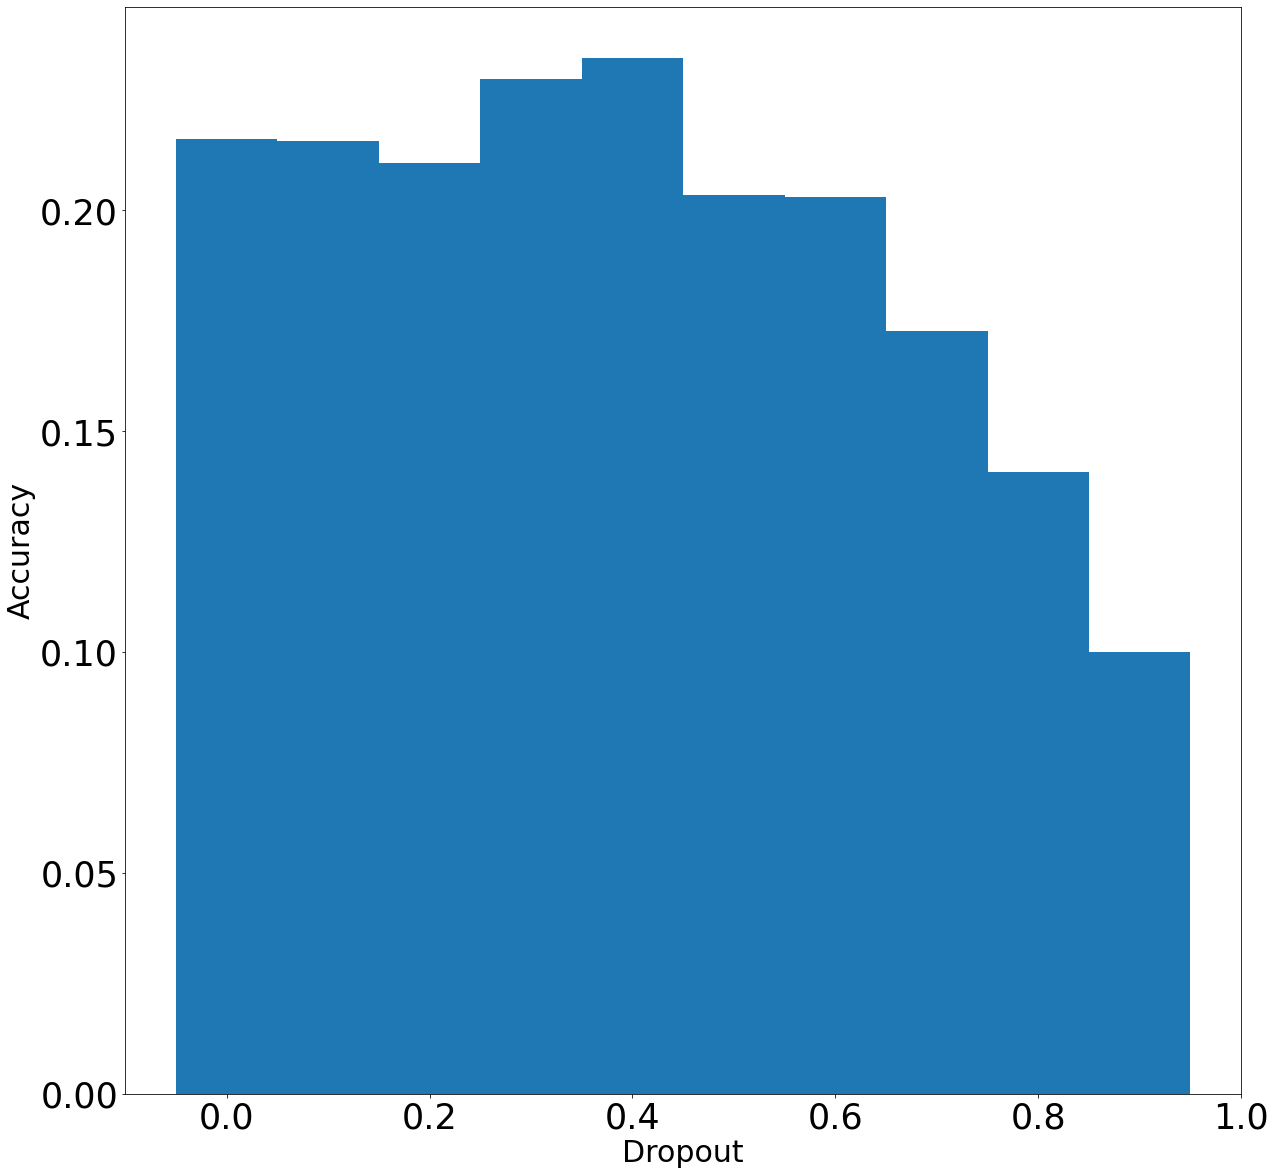

In [11]:
# with dropout
width = 0.1 
plt.bar(dropouts, acc, width, align='center') 
plt.tick_params(axis='both', which='major', labelsize=35) 
plt.tick_params(axis='both', which='minor', labelsize=35) 
plt.ylabel('Accuracy',size = 30) 
plt.xlabel('Dropout', size = 30) 
plt.show()



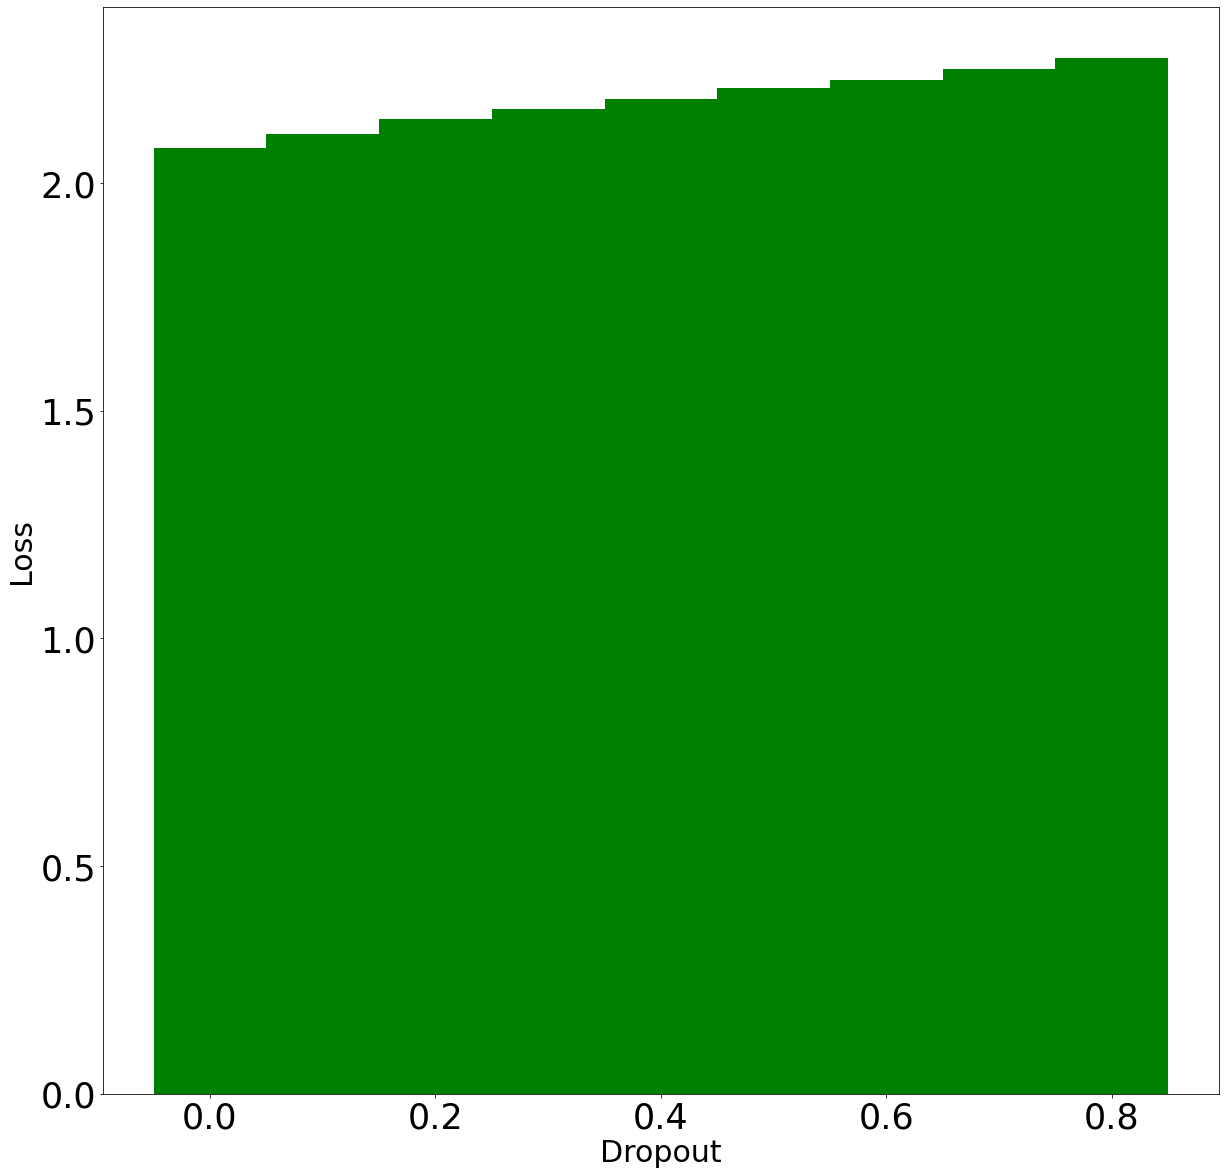

In [12]:
#non drop out
width = 0.1 
plt.bar(dropouts, loss, width, align='center',color = 'green') 
plt.tick_params(axis='both', which='major', labelsize=35) 
plt.tick_params(axis='both', which='minor', labelsize=35) 
plt.ylabel('Loss',size = 30) 
plt.xlabel('Dropout', size = 30) 
plt.show()

